# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [17]:
# Основные библиотеки для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [18]:
# Библиотеки машинного обучения
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Снижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Обнаружение аномалий
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Метрики качества
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Иерархическая кластеризация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [19]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

print("Первые 5 строк таблицы:")
print(df.head(), "\n")

print(f"Количество объектов (строк): {df.shape[0]}")
print(f"Количество признаков (столбцов, включая целевую переменную): {df.shape[1]}\n")

print("Названия признаков:")
print(wine.feature_names, "\n")

print("Количество классов в целевой переменной:")
print(df["target"].nunique())
print("Сами классы:", df["target"].unique(), "\n")

print("Проверка на пропущенные значения:")
print(df.isnull().sum(), "\n")

print("Информация о DataFrame:")
print(df.info(), "\n")

print("Основная статистика по признакам:")
print(df.describe())

Первые 5 строк таблицы:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

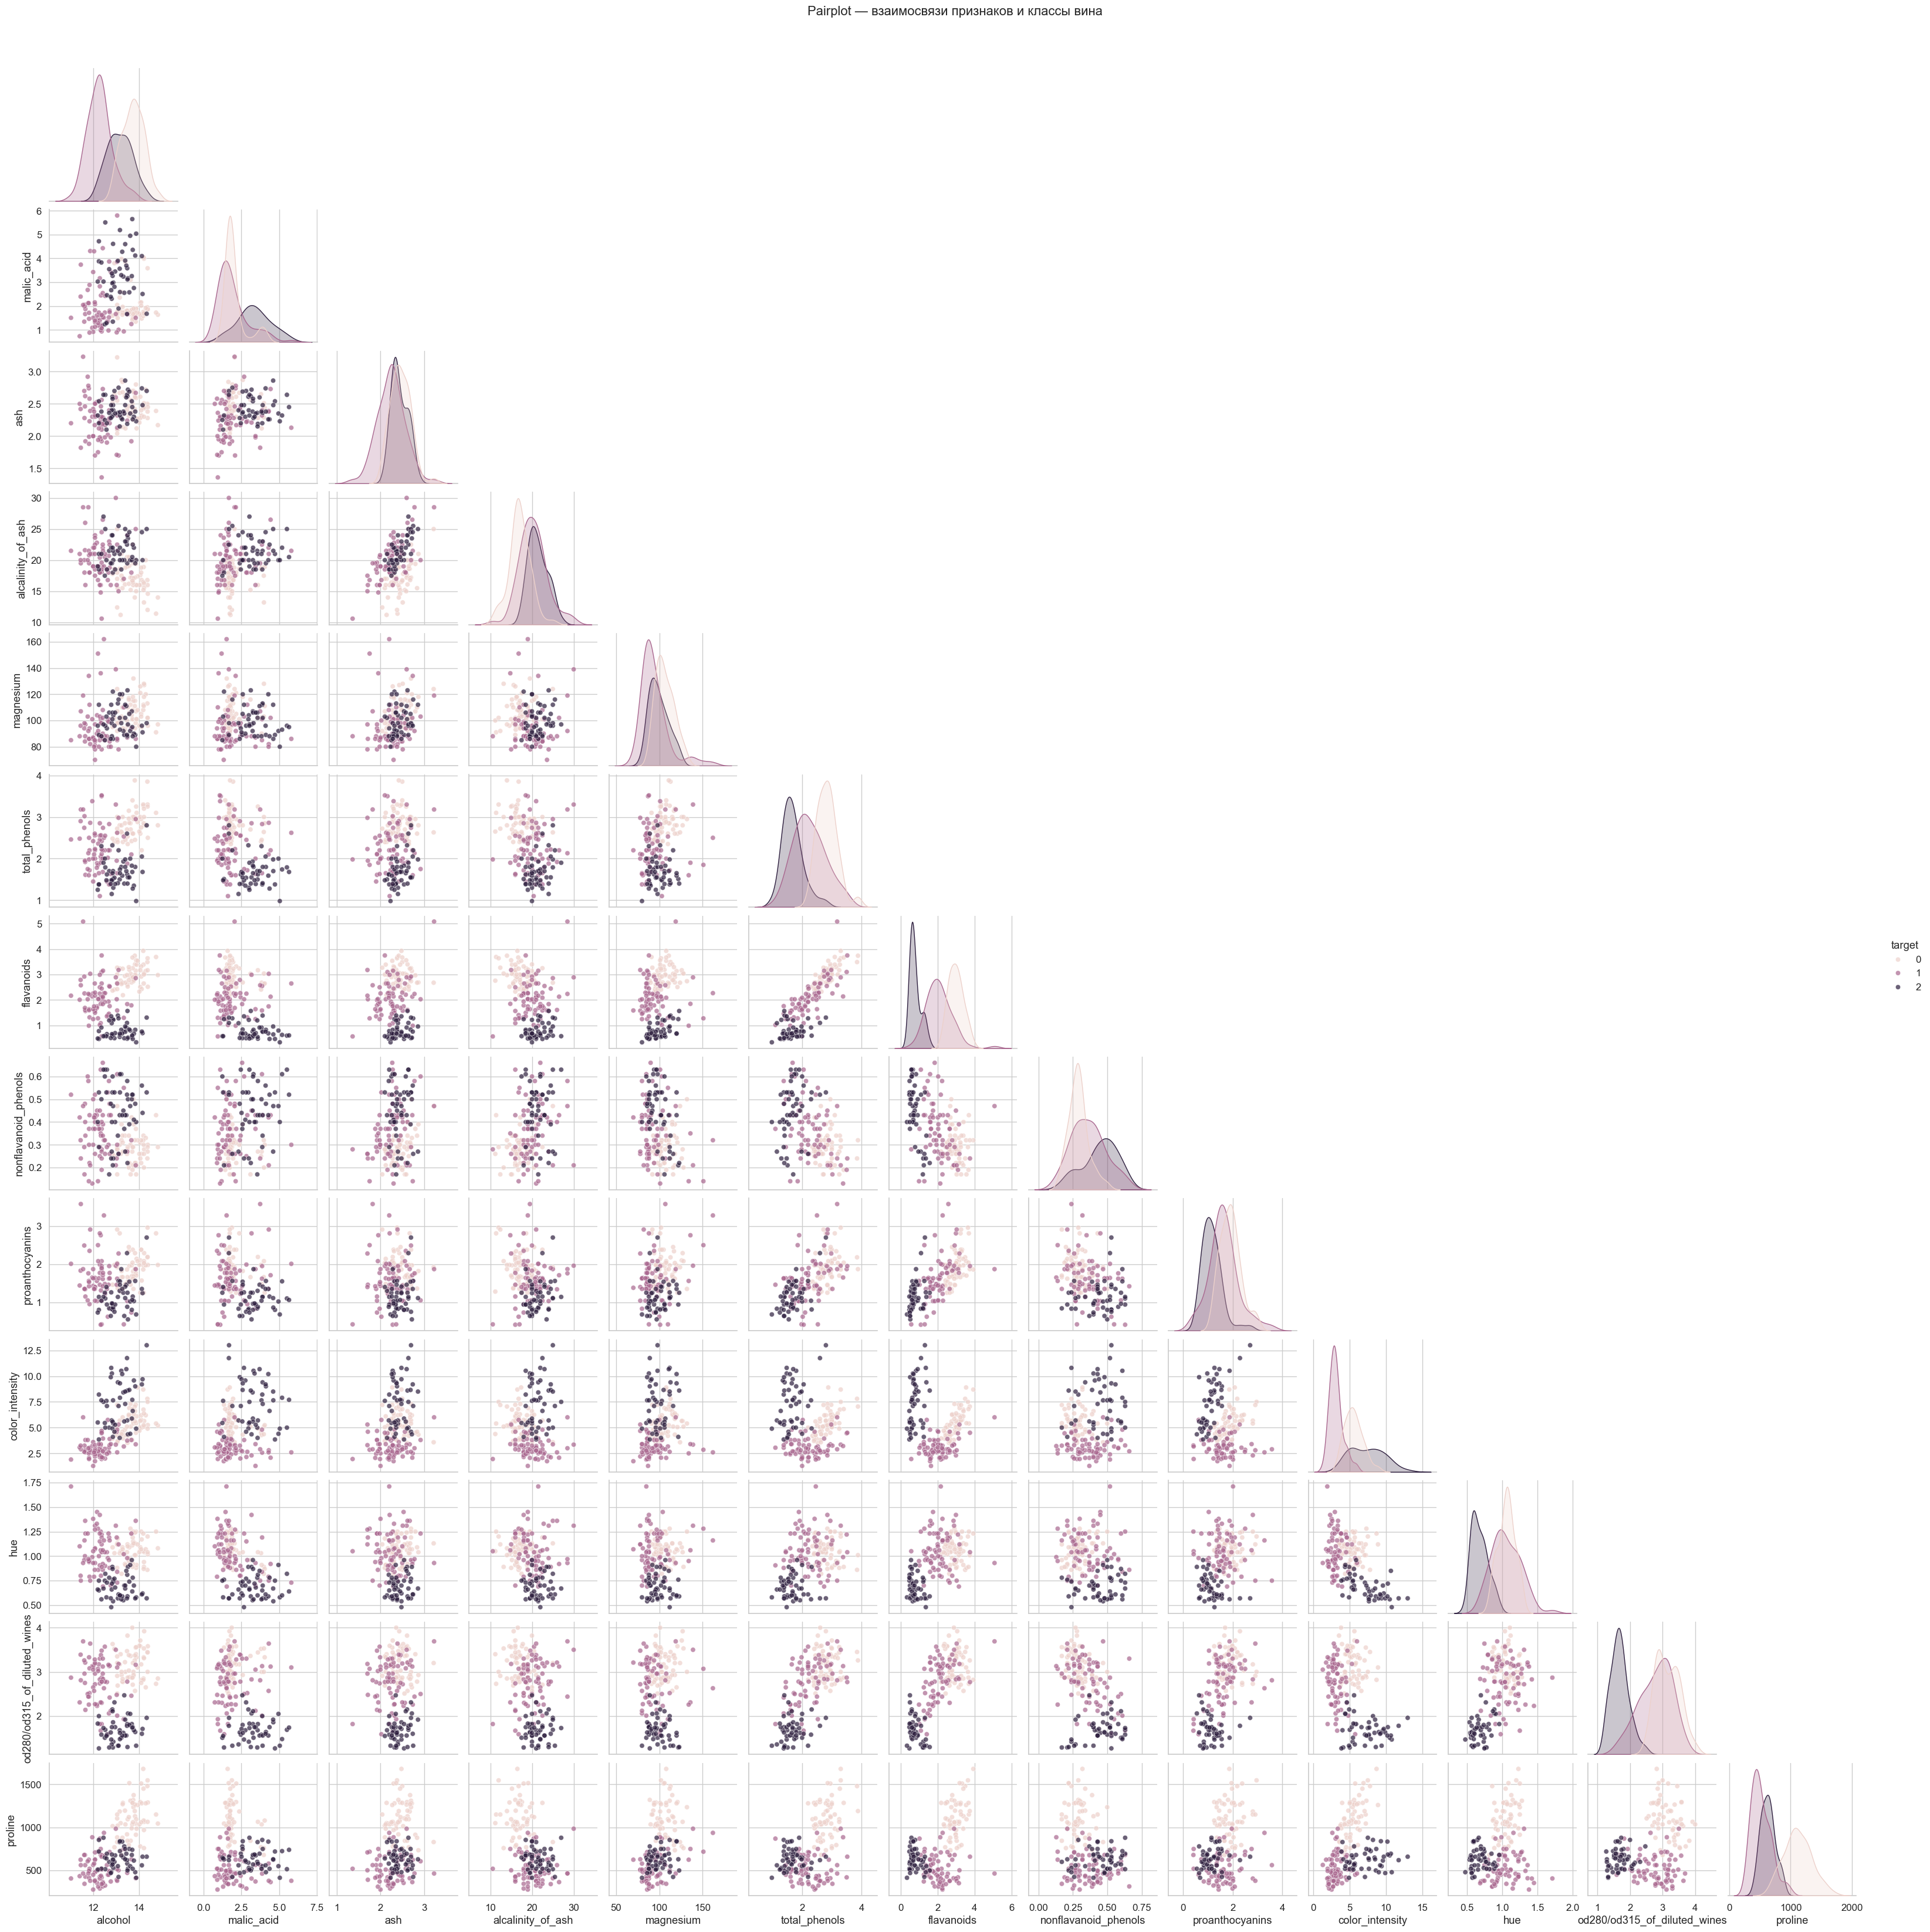

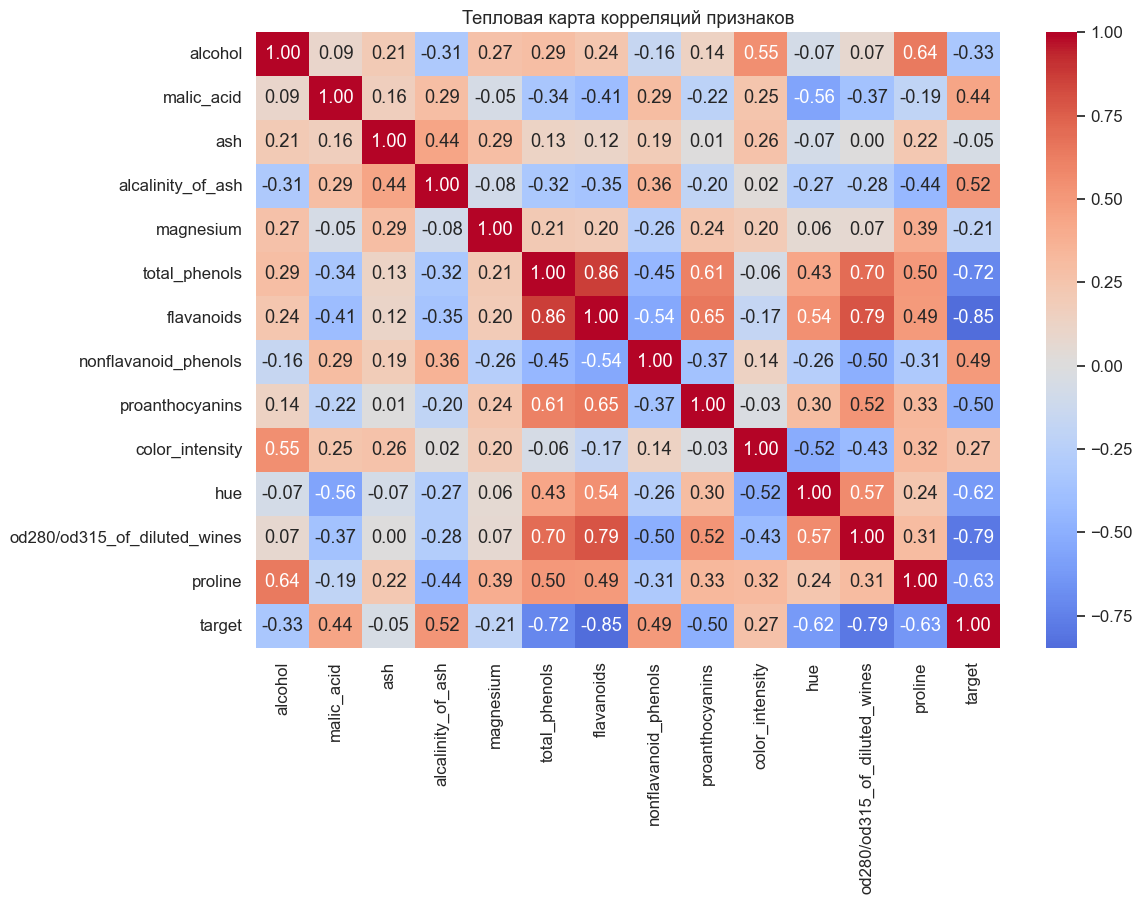

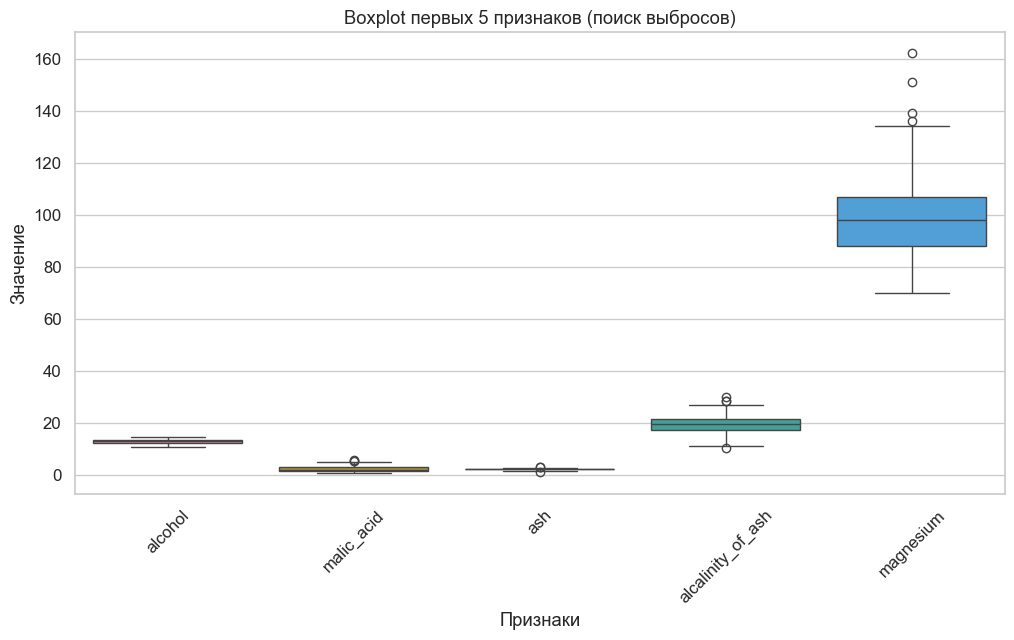

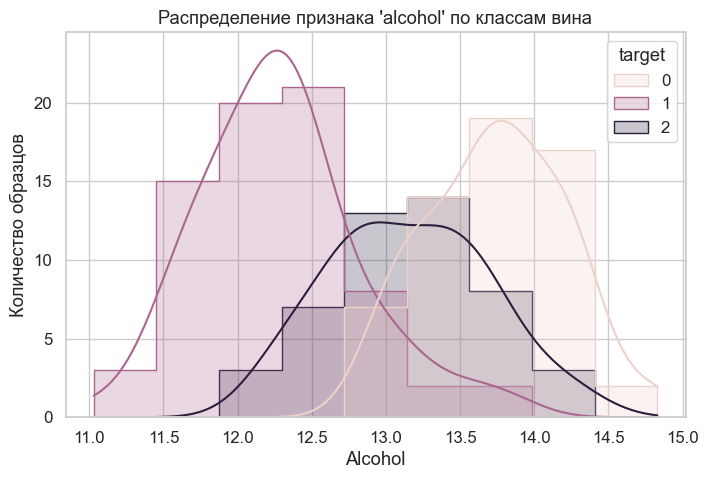

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

sns.set(style="whitegrid", palette="husl", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

sns.pairplot(df, hue="target", corner=True, diag_kind="kde", plot_kws={"alpha": 0.7})
plt.suptitle("Pairplot — взаимосвязи признаков и классы вина", y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Тепловая карта корреляций признаков")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[wine.feature_names[:5]])
plt.title("Boxplot первых 5 признаков (поиск выбросов)")
plt.xlabel("Признаки")
plt.ylabel("Значение")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="alcohol", hue="target", kde=True, element="step")
plt.title("Распределение признака 'alcohol' по классам вина")
plt.xlabel("Alcohol")
plt.ylabel("Количество образцов")
plt.show()


In [22]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

X_original = df.drop("target", axis=1)
y_true = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)

print("Первые 5 строк стандартизированных данных:")
print(X_scaled_df.head(), "\n")

print("Статистика после стандартизации:")
print(X_scaled_df.describe(), "\n")

Первые 5 строк стандартизированных данных:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.8479

## БЛОК 3: Кластеризация - K-Means

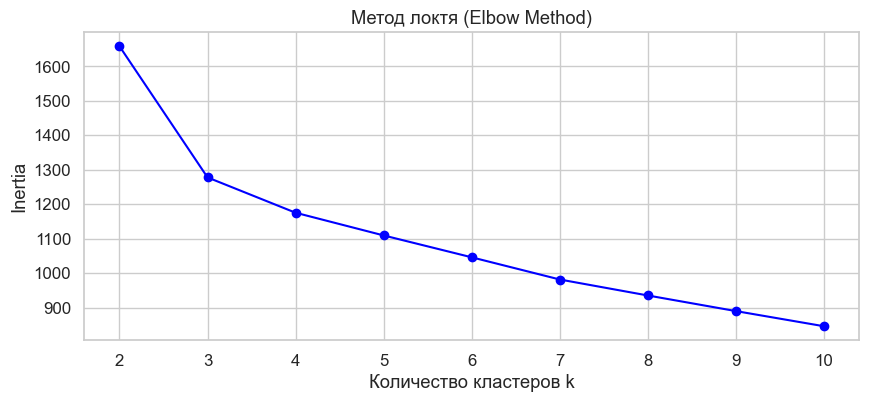

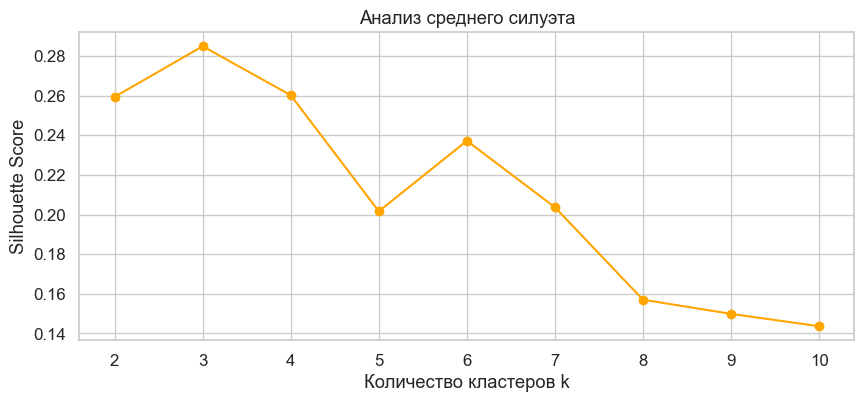

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), inertia, 'o-', color='blue')
plt.xticks(range(2, 11))
plt.title("Метод локтя (Elbow Method)")
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores, 'o-', color='orange')
plt.xticks(range(2, 11))
plt.title("Анализ среднего силуэта")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [25]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, y_pred)
calinski = calinski_harabasz_score(X_scaled, y_pred)
davies = davies_bouldin_score(X_scaled, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

print("РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS\n")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")
print(f"Adjusted Rand Index (сравнение с истинными метками): {ari:.3f}\n")


РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS

Silhouette Score: 0.285
Calinski-Harabasz Index: 70.940
Davies-Bouldin Index: 1.389
Adjusted Rand Index (сравнение с истинными метками): 0.897



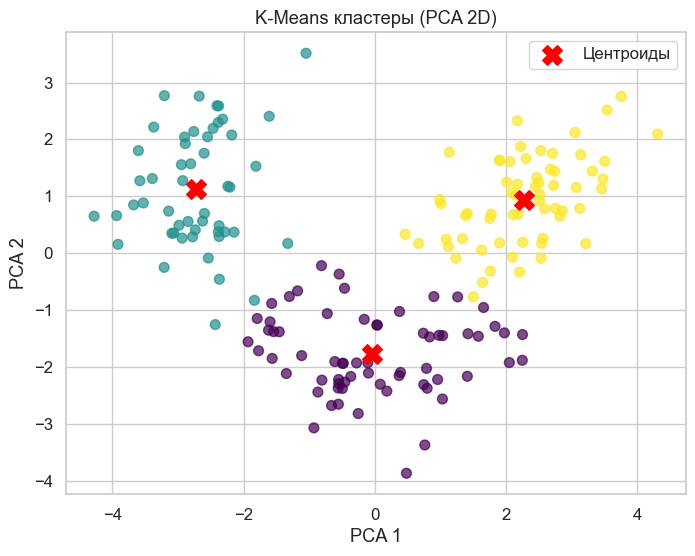

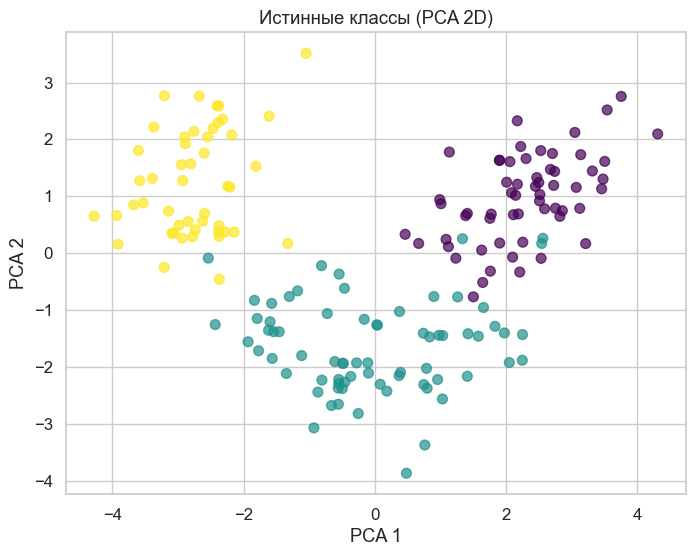

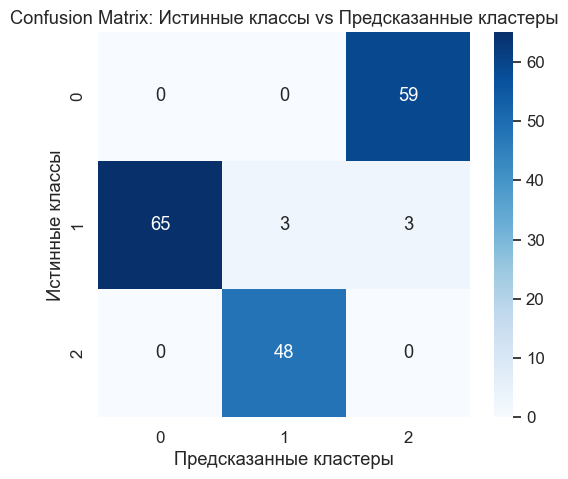

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Центроиды')
plt.title("K-Means кластеры (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title("Истинные классы (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Истинные классы vs Предсказанные кластеры")
plt.xlabel("Предсказанные кластеры")
plt.ylabel("Истинные классы")
plt.show()


## БЛОК 4: Иерархическая кластеризация

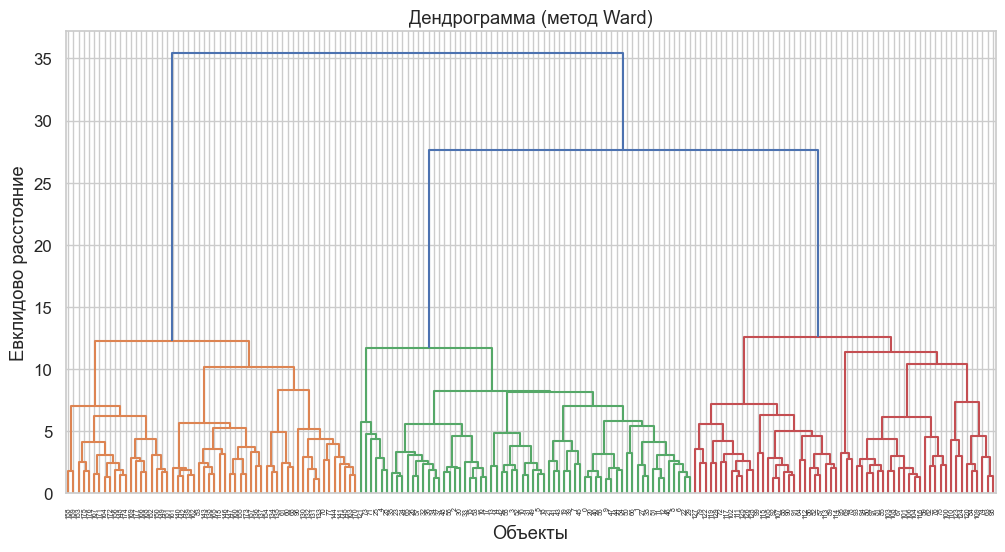

Количество уникальных кластеров: 3


In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=30)
plt.title("Дендрограмма (метод Ward)")
plt.xlabel("Объекты")
plt.ylabel("Евклидово расстояние")
plt.show()

clusters_h = fcluster(Z, 3, criterion='maxclust')
print("Количество уникальных кластеров:", np.unique(clusters_h).shape[0])


In [33]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

methods = ['ward', 'complete', 'average', 'single']
results = []

for method in methods:
    if method == 'ward':
        clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        clustering = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    
    y_pred = clustering.fit_predict(X_scaled)
    
    results.append({
        'Метод': method,
        'Silhouette': silhouette_score(X_scaled, y_pred),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, y_pred),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, y_pred)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)

print("Сравнение методов связывания:\n")
print(df_results, "\n")
print(f"Лучший метод по Silhouette Score: {df_results.loc[0, 'Метод']}")


Сравнение методов связывания:

      Метод  Silhouette  Calinski-Harabasz  Davies-Bouldin
0    single    0.504646         131.535896        0.492925
1   average    0.480267         149.025799        0.575269
2  complete    0.449618         213.081710        0.758358
3      ward    0.446689         222.719164        0.803467 

Лучший метод по Silhouette Score: single


## БЛОК 5: DBSCAN - плотностная кластеризация

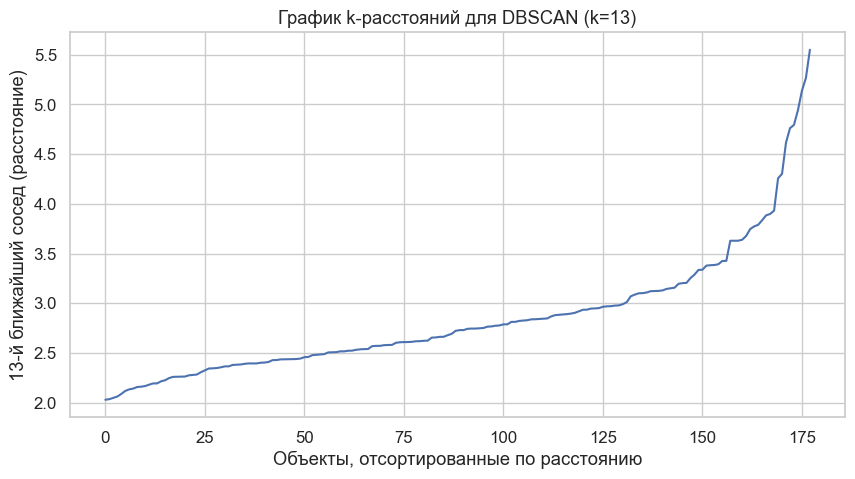

Рекомендуемые параметры для DBSCAN:
eps ≈ 3.640
min_samples = 14


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = X_scaled.shape[1]  # обычно min_samples = размерность + 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances_k = np.sort(distances[:, -1])
plt.figure(figsize=(10, 5))
plt.plot(distances_k)
plt.title(f"График k-расстояний для DBSCAN (k={k})")
plt.xlabel("Объекты, отсортированные по расстоянию")
plt.ylabel(f"{k}-й ближайший сосед (расстояние)")
plt.grid(True)
plt.show()

eps_opt = distances_k[int(len(distances_k) * 0.9)]  # приблизительно точка "локтя"
min_samples = k + 1

print(f"Рекомендуемые параметры для DBSCAN:\neps ≈ {eps_opt:.3f}\nmin_samples = {min_samples}")


In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.65, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise = list(y_db).count(-1)
cluster_sizes = Counter(y_db)

print("DBSCAN результаты:")
print(f"Количество найденных кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")
print(f"Размеры кластеров (включая шум -1): {dict(cluster_sizes)}\n")

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km = kmeans.fit_predict(X_scaled)

print("Сравнение с K-Means:")
print(f"Silhouette Score DBSCAN: {silhouette_score(X_scaled, y_db):.3f}")
print(f"Silhouette Score K-Means: {silhouette_score(X_scaled, y_km):.3f}")

print("\nЗаключение:")
if silhouette_score(X_scaled, y_db) > silhouette_score(X_scaled, y_km):
    print("DBSCAN показал лучшие результаты по Silhouette Score.")
else:
    print("K-Means показал лучшие результаты по Silhouette Score.")


DBSCAN результаты:
Количество найденных кластеров: 2
Количество шумовых точек: 14
Размеры кластеров (включая шум -1): {np.int64(0): 46, np.int64(-1): 14, np.int64(1): 90}

Сравнение с K-Means:
Silhouette Score DBSCAN: 0.480
Silhouette Score K-Means: 0.460

Заключение:
DBSCAN показал лучшие результаты по Silhouette Score.


## БЛОК 6: Снижение размерности

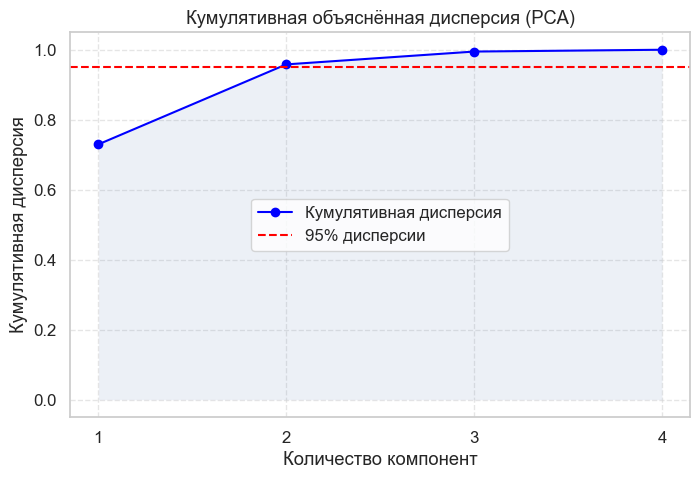

Количество главных компонент для объяснения 95% дисперсии: 2

Loadings (веса признаков в главных компонентах):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1              0.521            -0.269              0.580             0.565
PC2              0.377             0.923              0.024             0.067
PC3              0.720            -0.244             -0.142            -0.634
PC4             -0.261             0.124              0.801            -0.524


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='-', color='blue', label='Кумулятивная дисперсия')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% дисперсии')
plt.fill_between(range(1, len(explained_variance)+1), cumulative_variance, 0, alpha=0.1)
plt.title("Кумулятивная объяснённая дисперсия (PCA)")
plt.xlabel("Количество компонент")
plt.ylabel("Кумулятивная дисперсия")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Количество главных компонент для объяснения 95% дисперсии: {n_components_95}")

loadings_df = pd.DataFrame(np.round(pca.components_, 3), columns=feature_names, index=[f'PC{i+1}' for i in range(len(feature_names))])
print("\nLoadings (веса признаков в главных компонентах):")
print(loadings_df)


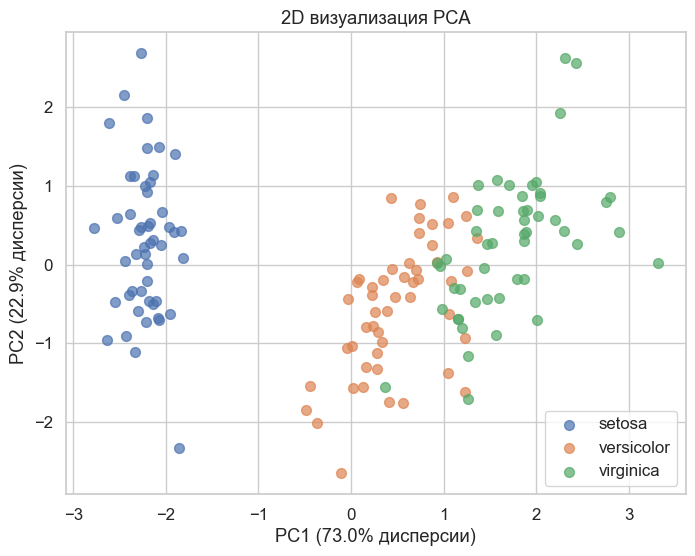

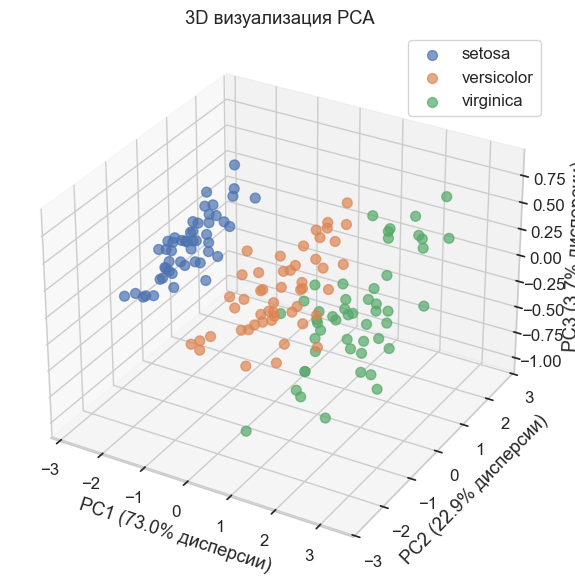

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 2D scatter plot
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca_2d[y==i, 0], X_pca_2d[y==i, 1], label=target_name, s=50, alpha=0.7)
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% дисперсии)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% дисперсии)")
plt.title("2D визуализация PCA")
plt.legend()
plt.grid(True)
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
for i, target_name in enumerate(target_names):
    ax.scatter(X_pca_3d[y==i, 0], X_pca_3d[y==i, 1], X_pca_3d[y==i, 2], label=target_name, s=50, alpha=0.7)
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}% дисперсии)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}% дисперсии)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}% дисперсии)")
ax.set_title("3D визуализация PCA")
ax.legend()
plt.show()


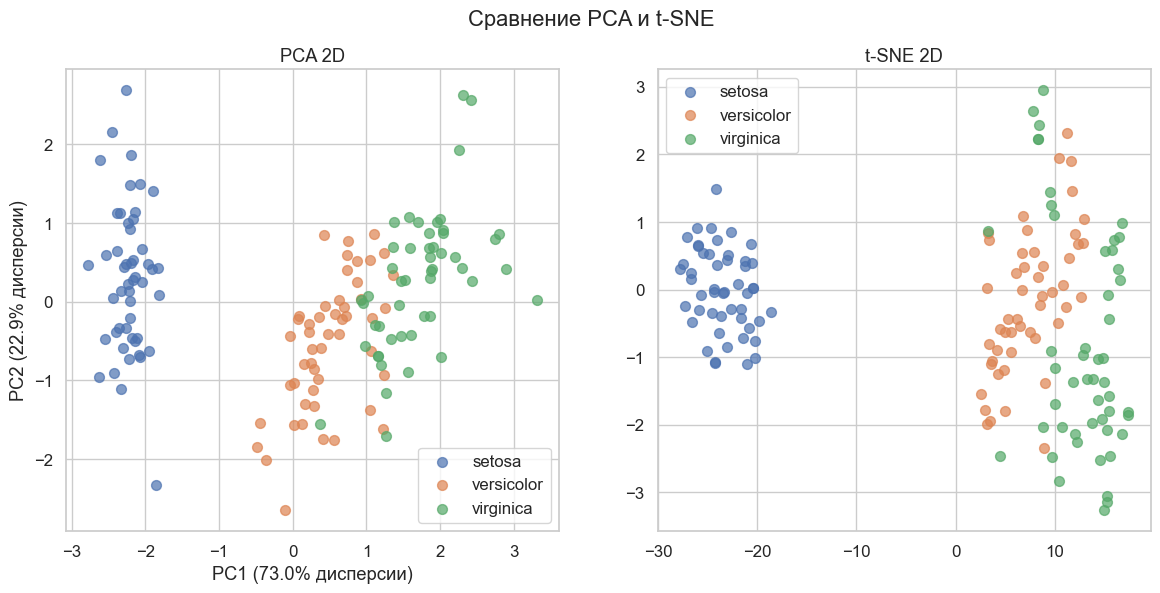

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14,6))

for i, target_name in enumerate(target_names):
    axes[0].scatter(X_pca[y==i, 0], X_pca[y==i, 1], label=target_name, alpha=0.7, s=50)
axes[0].set_title("PCA 2D")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)")
axes[0].legend()
axes[0].grid(True)

for i, target_name in enumerate(target_names):
    axes[1].scatter(X_tsne[y==i, 0], X_tsne[y==i, 1], label=target_name, alpha=0.7, s=50)
axes[1].set_title("t-SNE 2D")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Сравнение PCA и t-SNE")
plt.show()


## БЛОК 7: Обнаружение аномалий

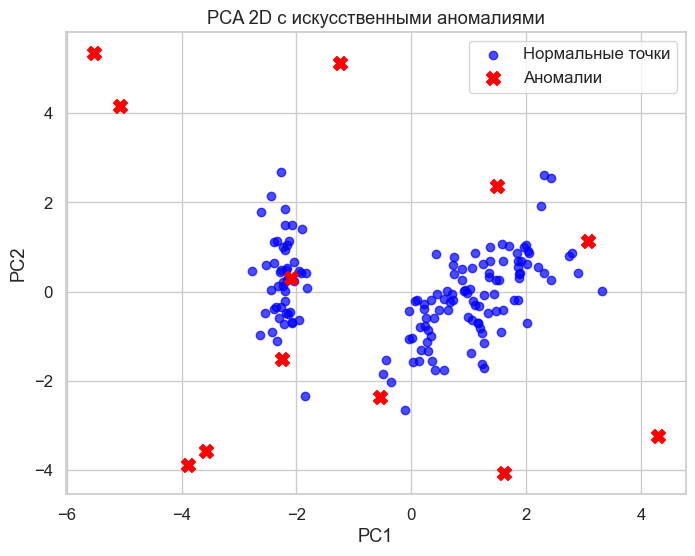

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание аномалий
np.random.seed(42)
n_anomalies = 12
anomalies = np.random.uniform(low=X_pca.min(axis=0)-3, high=X_pca.max(axis=0)+3, size=(n_anomalies, 2))

# Объединяем данные
X_pca_with_anom = np.vstack([X_pca, anomalies])
labels = np.ones(X_pca_with_anom.shape[0])
labels[-n_anomalies:] = -1  # -1 — аномалии

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_pca_with_anom[labels==1, 0], X_pca_with_anom[labels==1, 1], c='blue', label='Нормальные точки', alpha=0.7)
plt.scatter(X_pca_with_anom[labels==-1, 0], X_pca_with_anom[labels==-1, 1], c='red', label='Аномалии', marker='X', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D с искусственными аномалиями')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Загрузка и стандартизация данных
data = load_iris()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание искусственных аномалий
np.random.seed(42)
n_anomalies = 12
anomalies = np.random.uniform(low=X_scaled.min(axis=0)-3, high=X_scaled.max(axis=0)+3, size=(n_anomalies, X_scaled.shape[1]))

X_aug = np.vstack([X_scaled, anomalies])
labels = np.ones(X_aug.shape[0])
labels[-n_anomalies:] = -1  # -1 = аномалии

# Определяем долю аномалий
contamination = n_anomalies / X_aug.shape[0]

# Инициализация моделей
models = {
    "Isolation Forest": IsolationForest(contamination=contamination, random_state=42),
    "One-Class SVM": OneClassSVM(kernel='rbf', nu=contamination, gamma='scale'),
    "LOF": LocalOutlierFactor(n_neighbors=20, contamination=contamination)
}

# Применение моделей и вычисление метрик
results = []
for name, model in models.items():
    if name == "LOF":
        y_pred = model.fit_predict(X_aug)
    else:
        y_pred = model.fit(X_aug).predict(X_aug)
        
    results.append({
        "Метод": name,
        "Accuracy": accuracy_score(labels, y_pred),
        "Precision": precision_score(labels, y_pred, pos_label=-1),
        "Recall": recall_score(labels, y_pred, pos_label=-1)
    })

df_metrics = pd.DataFrame(results).sort_values(by="Recall", ascending=False).reset_index(drop=True)

print("Сравнение алгоритмов обнаружения аномалий:\n")
print(df_metrics)


Сравнение алгоритмов обнаружения аномалий:

              Метод  Accuracy  Precision    Recall
0  Isolation Forest  0.987654   0.916667  0.916667
1               LOF  0.987654   0.916667  0.916667
2     One-Class SVM  0.913580   0.416667  0.416667


## БЛОК 8: Комплексный анализ и интерпретация

Сравнение методов кластеризации:

                  Метод  Silhouette       ARI       NMI  Время, с
0                KMeans    0.459948  0.620135  0.659487    0.0566
1  Agglomerative (ward)    0.446689  0.615323  0.675470    0.0005
2                DBSCAN    0.480311  0.499194  0.585406    0.0016


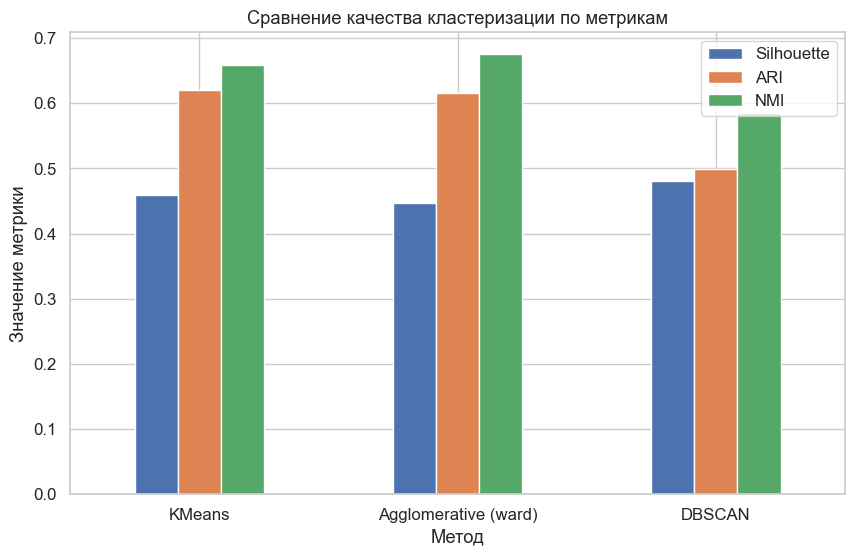

In [50]:
import time
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

methods = {
    "KMeans": {"model": KMeans(n_clusters=3, random_state=42, n_init=10)},
    "DBSCAN": {"model": DBSCAN(eps=0.65, min_samples=5)},
    "Agglomerative (ward)": {"model": AgglomerativeClustering(n_clusters=3, linkage='ward')}
}

results = []

for name, params in methods.items():
    model = params["model"]
    start = time.time()
    y_pred = model.fit_predict(X_scaled)
    elapsed = time.time() - start
    
    # DBSCAN может выдавать все точки шумом, проверим
    if len(set(y_pred)) <= 1:
        sil_score = float('nan')
    else:
        sil_score = silhouette_score(X_scaled, y_pred)
    
    results.append({
        "Метод": name,
        "Silhouette": sil_score,
        "ARI": adjusted_rand_score(y_true, y_pred),
        "NMI": normalized_mutual_info_score(y_true, y_pred),
        "Время, с": round(elapsed, 4)
    })

df_results = pd.DataFrame(results).sort_values(by="ARI", ascending=False).reset_index(drop=True)
print("Сравнение методов кластеризации:\n")
print(df_results)

# Визуализация
import matplotlib.pyplot as plt
df_results.plot(x="Метод", y=["Silhouette","ARI","NMI"], kind="bar", figsize=(10,6))
plt.title("Сравнение качества кластеризации по метрикам")
plt.ylabel("Значение метрики")
plt.xticks(rotation=0)
plt.show()


Средние значения признаков по кластерам:

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
Cluster                    
0                1.413208  
1                0.246000  
2                1.972340  


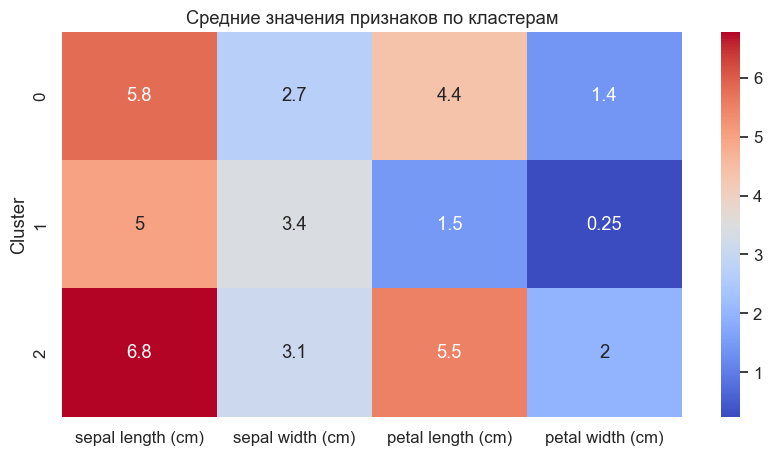

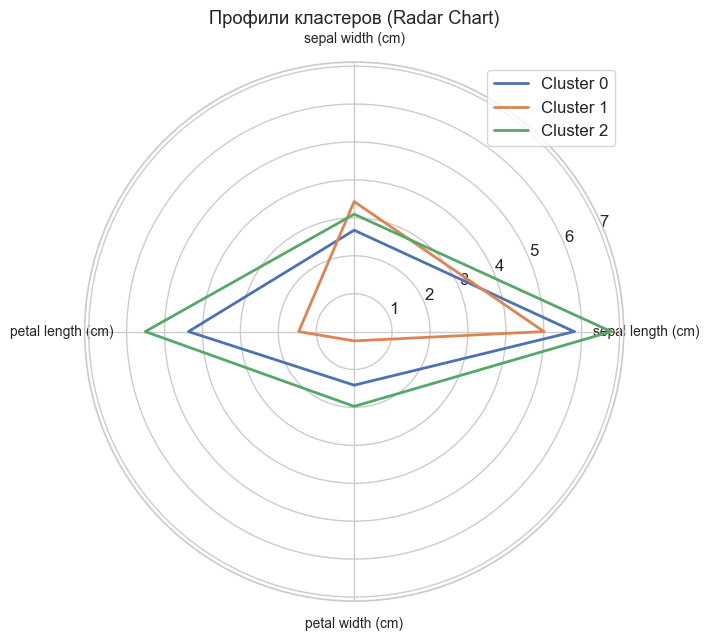

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (лучший метод)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
X['Cluster'] = labels

# Средние значения признаков по кластерам
cluster_means = X.groupby('Cluster').mean()
print("Средние значения признаков по кластерам:\n")
print(cluster_means)

# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm")
plt.title("Средние значения признаков по кластерам")
plt.show()

# Radar chart
categories = list(cluster_means.columns)
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(7,7))
for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)

plt.xticks(angles[:-1], categories, fontsize=10)
plt.title("Профили кластеров (Radar Chart)")
plt.legend(loc='upper right')
plt.show()
